### Case Study - Honey Production

Source Credit : https://www.kaggle.com/jessicali9530/honey-production

#### Context
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component to American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. Twelve years later, some industries are observing recovery but the American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America by state from 1998 to 2012.

#### Content
The National Agricultural Statistics Service (NASS) is the primary data reporting body for the US Department of Agriculture (USDA). NASS's mission is to "provide timely, accurate, and useful statistics in service to U.S. agriculture". From datasets to census surveys, their data covers virtually all aspects of U.S. agriculture. Honey production is one of the datasets offered. Click here for the original page containing the data along with related datasets such as Honey Bee Colonies and Cost of Pollination. Data wrangling was performed in order to clean the dataset. honeyproduction.csv is the final tidy dataset suitable for analysis. The three other datasets (which include "honeyraw" in the title) are the original raw data downloaded from the site. They are uploaded to this page along with the "Wrangling The Honey Production Dataset" kernel as an example to show users how data can be wrangled into a cleaner format. Useful metadata on certain variables of the honeyproduction dataset is provided below:

  - <b>numcol</b>: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year
  - <b>yieldpercol</b>: Honey yield per colony. Unit is pounds
  - <b>totalprod</b>: Total production (numcol x yieldpercol). Unit is pounds
  - <b>stocks</b>: Refers to stocks held by producers. Unit is pounds
  - <b>priceperlb</b>: Refers to average price per pound based on expanded sales. Unit is dollars.
  - <b>prodvalue</b>: Value of production (totalprod x priceperlb). Unit is dollars.
    
Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.

#### Inspiration
   - How has honey production yield changed from 1998 to 2012?
   - Over time, which states produce the most honey? Which produce the least? Which have experienced the most change in honey yield?
   - Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006, which was when concern over Colony Collapse Disorder spread nationwide?
   - Are there any patterns that can be observed between total honey production and value of production every year?
   - How has value of production, which in some sense could be tied to demand, changed every year?


#### Import pandas, numpy, seaborn, matplotlib.pyplot packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Import the honeyproduction.csv file

In [2]:
mydata = pd.read_csv("honeyproduction.csv")

#### Explore the data for non-null and extreme values

In [3]:
display(mydata.head())
print(f"Min. Year: { mydata.year.min() }")
print(f"Max. Year: {mydata.year.max()}")
print(f"Unique Years: {mydata.year.nunique()}")
print(f"Dataframe Shape: {mydata.shape}")


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


Min. Year: 1998
Max. Year: 2012
Unique Years: 15
Dataframe Shape: (626, 8)


In [ ]:
mydata.describe().transpose()

In [ ]:
mydata.info()

#### How many States are included in the dataset?

In [ ]:
mydata['state'].nunique()

#### Which are he States that are included in this dataset?

In [ ]:
mydata['state'].unique()

#### Calculate the average production for each state across all years

In [ ]:
mydata[''].str.replace(',','')
mydata[''].str.astype(int)

In [ ]:
mydata[['state', 'totalprod']].groupby('state').mean().round(2).head()

#### Which State has seen highest volume in production, and in which year?

In [ ]:
max_val = mydata['totalprod'].max()
mydata[mydata['totalprod'] == max_val]

#### What is the average yield per colony , for each year?

In [ ]:
table = mydata[['year', 'yieldpercol']].groupby('year').mean().round()
sns.lineplot(x = 'year', y = 'yieldpercol', data=table)

#### Is there correlation between any 2 Numeric variables? Test for the same using Visual techniques

In [ ]:
sns.pairplot(mydata[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']])

In [ ]:
cor = mydata[['numcol', 
              'yieldpercol', 
              'totalprod', 
              'stocks', 
              'priceperlb', 
              'prodvalue']].corr()

cor

In [ ]:
sns.heatmap(cor,annot=True,cmap='PiYG',vmin=-1,vmax=1)

#### What is the general Production trend from 1998 to 2012? Describe visually

In [ ]:
g = sns.lineplot(x = mydata['year'], y = mydata['totalprod'])
## g = sns.pointplot(x = 'year', y = 'totalprod', data = mydata) ## Exact Same

## Rotate the lables
g = g.set_xticklabels(g.get_xticklabels(), rotation=30)


#### How is the production trend for each State? Describe visually - Hint (Use sns.FacetGrid() & g.map() functions)

In [ ]:
g = sns.FacetGrid(mydata, col="state", col_wrap=5, height=3)
g = g.map(sns.lineplot, "year", "totalprod", marker=".")

#### Is there a linear relationship between the Number of Colonies & Value in Production? Check at an overall level, at state and year levels as well

In [ ]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata)

In [ ]:
## Split out by year
sns.lmplot(x="numcol", y="prodvalue", data=mydata, hue='state')

In [ ]:
# Interactive scatter plot using plotly package
import plotly.express as px
px.scatter(mydata, x = 'numcol', y = 'prodvalue', 
           animation_frame = 'year', 
           size = 'totalprod')

#### Check the distribution of total prodcution across each year using boxplots

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
#sns.boxplot(x = 'year', y = 'totalprod',data=mydata)

## No outliers
sns.boxplot(x = 'year', y = 'totalprod',data=mydata, showfliers = False)

#### How has the Value in Production changed over the years?

In [ ]:
sns.pointplot(x = mydata['year'], y = mydata['prodvalue'])

#### What is the linear relationship between Production volume & value over the years?

In [ ]:
sns.lmplot(x="totalprod", y="prodvalue", data=mydata)

## Bonus: Some Additional Features I Found Useful

#### Tired of plain white backgrounds and dull graphs?

In [ ]:
## Before
print("Before")
sns.lmplot(x="totalprod", y="prodvalue", data=mydata)
plt.show()

## Set aesthetic parameters in one step.
sns.set(context='notebook',
        style='darkgrid',
        palette='deep',
        font='sans-serif',
        font_scale=1,
        color_codes=True,
        rc=None)

print("\nAfter")
sns.lmplot(x="totalprod", y="prodvalue", data=mydata)
plt.show()

#### Want to clean up those axis and titles?
###### Lets find the top states by overall production, as a % of total production

In [ ]:
df = mydata[['state','totalprod']].groupby('state').sum().reset_index()
df['perc_production'] = df['totalprod'] / df['totalprod'].sum()
df = df.sort_values('perc_production', ascending = False)
df.head()

In [ ]:
## Lets make the plot a bit larger
plt.figure(figsize=(20,15))

ax = sns.barplot(x="perc_production", y="state", data=df, palette='coolwarm')

## Percentages on x axis
vals = ax.get_xticks()
ax.set_xticklabels(['%1.0f%%' %(i*100) for i in vals])

## Rename the X & y axis lables
ax.set(xlabel = "% of Production", ylabel =ax.get_ylabel().title() );

## Give the plot a title
plt.title("Top States by % of Total Production", size = 18)

## Add % to end of bar as annotation
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_width()* 100), ## Create % Symbol
    (p.get_x() + p.get_width() +0.003, ## Determine position along X axis (first part of a tuple)
      p.get_y()+(p.get_height()/2)), ## Deterimine postition along Y axis (2nd part of a tuple)
    ha='center', va='center', ## Starting point for measurement on vertical axis (VA) and horizontal axis (HA)
    color= 'black')

plt.show();

/Users/nw/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


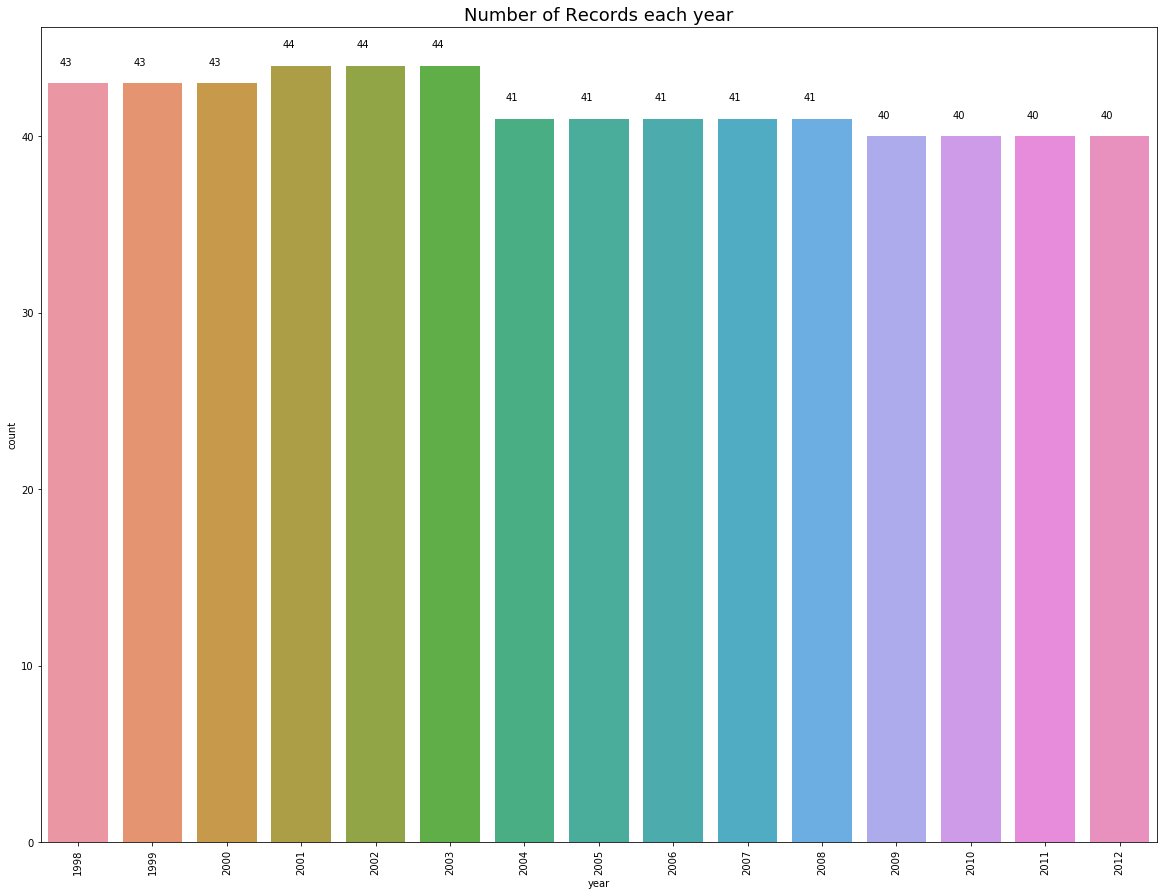

In [12]:
plt.figure(figsize=(20,15))
plt.title("Number of Records each year", size = 18)
ax= sns.countplot(mydata['year'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))

In [ ]:
movie['Release Date Convert'] = pd.to_datetime(movie['release date'], format = '%d-%b-%Y')
movie ['Release Year'] = movie['Release Date Convert'].dt.year
plt.figure(figsize=(20,15))
plt.title("Number of Movies released each year", size = 18)
ax= sns.countplot(movie['Release Year'])
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center